In [3]:
import pandas as pd
state_unemp=pd.read_csv("data/folium_US_Unemployment_Oct2012.csv")

In [13]:
import folium
map=folium.Map(location=[40,-98],zoom_start=4)
state_geo='data/folium_us-states.json'

map.choropleth(geo_data=state_geo,data = state_unemp,key_on='feature.id',
               columns=['State','Unemployment'],fill_color='YlGn')
map

In [20]:
map=folium.Map(location=[37.519477, 127.133483],zoom_start=15)
folium.Marker(location=[37.519477, 127.133483],
              popup='올림픽공원',icon=folium.Icon(color='red',icon='star')).add_to(map)
folium.CircleMarker(location=[37.519477, 127.133483],
              popup='올림픽공원',radius=50,color='#ffffgg',fill_color='#fffggg').add_to(map)
map

### wordCloud
     - pip install wordcloud
     

In [37]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [34]:
text=open('constitution.txt')
text=text.read()
text[:100]

'We the People of the United States, in Order to form a more perfect Union, establish Justice, insure'

(-0.5, 399.5, 199.5, -0.5)

<Figure size 432x288 with 0 Axes>

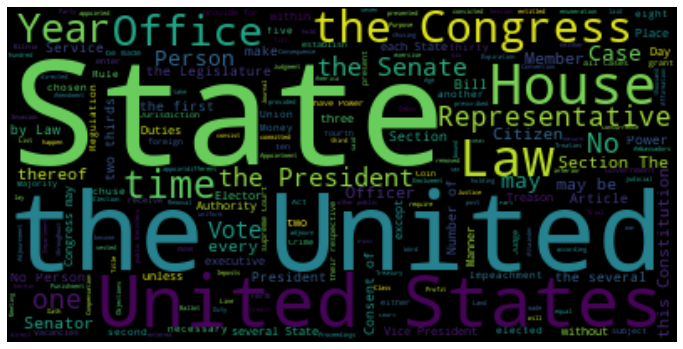

In [39]:
wc=WordCloud().generate(text)
dir(wc)
wc.words_
plt.figure()

plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

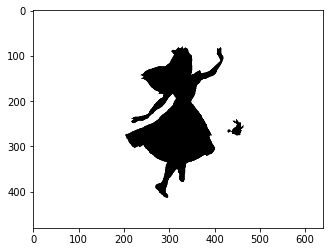

In [44]:
from PIL import Image    # 이미지불러오는 기능
import numpy as np
alice_mask=np.array(Image.open('alice_mask.png'))
alice_mask

plt.imshow(alice_mask)

In [47]:
text=open('alice.txt').read()
text[:100]

"癤풮roject Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use o"

(-0.5, 639.5, 479.5, -0.5)

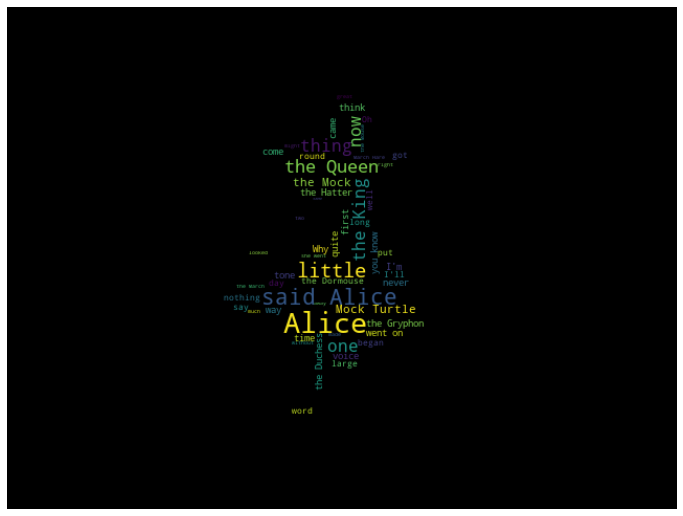

In [55]:
stop=set(STOPWORDS)
stop.add("said")

wc=WordCloud(mask=alice_mask,stopwords=stop).generate(text)
#wc=WordCloud(mask=alice_mask,stopwords=stop,background_color='white').generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

#### konlpy
     - http://konlpy.org

(-0.5, 639.5, 479.5, -0.5)

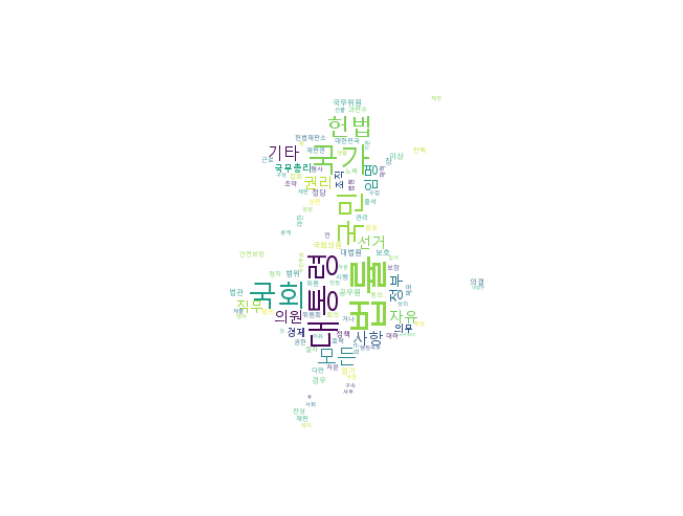

In [75]:
import konlpy
import platform
from konlpy.tag import Twitter
# 트위터 대신에 Okt라고 사용해도된다.

from konlpy.corpus import kolaw

import nltk


ko_text=kolaw.open('constitution.txt').read()
ko_text[:200]

stop_words=['제','월','일','조','수','때','그','이','바','및','안','정','위','관']

t=Twitter()
#t.nouns('아버지가방에들어가신다')
ko_token=t.nouns(ko_text)
len(ko_token)
ko_token=[each_word for each_word in ko_token if each_word not in stop_words]
len(ko_token)


ko=nltk.Text(ko_token)
ko.vocab()
data=ko.vocab().most_common(500)


wc=WordCloud(mask=alice_mask,font_path='C:\Windows\Fonts\malgun.ttf',background_color='white').generate_from_frequencies(dict(data))
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')